In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import glob
from sklearn import metrics
#from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

#import Libraries ที่ต้องใช้

ModuleNotFoundError: No module named 'keras'

In [2]:
filenames = glob.glob ('/Users/pantawatthunanukul/Desktop/image processing/face_mini/*/*')
im_arr = []
for i in range(3000):
  img = image.load_img(filenames[i],target_size=(90,90),interpolation='nearest')
  img = image.img_to_array(img) #convert img to arr
  img = img/255  #normalizeed color img
  all_images = im_arr.append(img)
    
#โหลดรูปภาพจาก filenames จานวน 3000 รูปโดยการ resize รูปภาพเป็น 90 และใช้ nearest เพื่อ ให้รูปปแสดงเป็นรูปสี่เหลี่ยมหรือบล็อก จากนั้น convert ภาพให้เป็น float และ normalizeed กำหนดให้ /255 แล้ว append รูปทั้งหมดเข้า มาในตัวแปร all_imgs

In [3]:
all_images = np.array(im_arr)
# convert to numpy array

train_x, test_x = train_test_split(all_images, random_state=32, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=32, test_size=0.3)
#(random seed)random_state=32 เพื่อให้ปรับพารามิเตอร์มันนิ่ง 

In [4]:
all_images.shape
#แสดงค่ามันออกมาดู

(3000, 90, 90, 3)

In [5]:
np.random.normal(0,1,2)
Nmean = 0
Nstd = 1
noise_factor = 0.1
#ใส่ค่า noise_factor (มันเป็น scalar ใส่ค่า 0.1)
#กำหนดค่า [ Nmean = 0 , Nstd = 1 ] ตามอาจาร์ย

x_train_noisy = train_x + (noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=train_x.shape))
x_val_noisy = val_x + ( noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=val_x.shape))
x_test_noisy = test_x + ( noise_factor * np.random.normal(loc=Nmean, scale=Nstd, size=test_x.shape))
#สร้าง noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training output: without Noise')

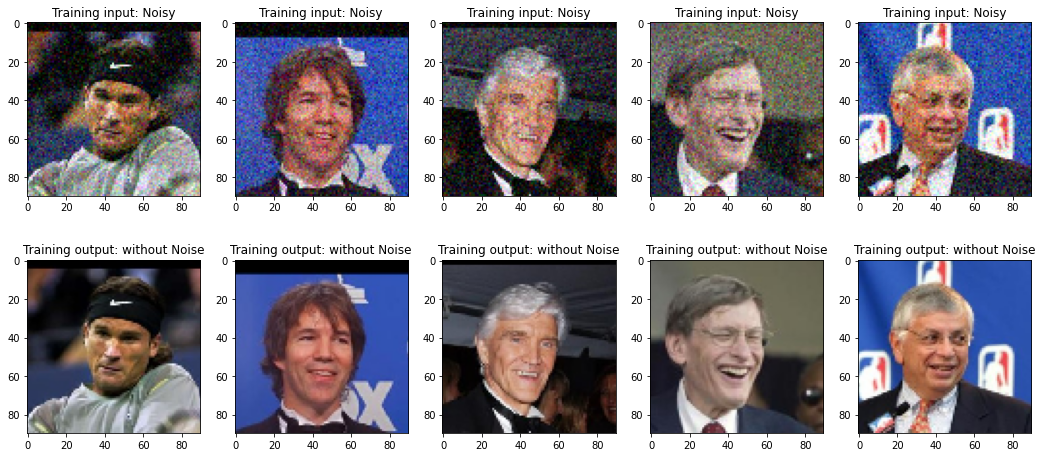

In [6]:
plt.figure(figsize=(18,8))
plt.subplot(2,5,1); plt.imshow(x_train_noisy[0])
plt.title('Training input: Noisy')
plt.subplot(2,5,2); plt.imshow(x_train_noisy[1])
plt.title('Training input: Noisy')
plt.subplot(2,5,3); plt.imshow(x_train_noisy[2])
plt.title('Training input: Noisy')
plt.subplot(2,5,4); plt.imshow(x_train_noisy[3])
plt.title('Training input: Noisy')
plt.subplot(2,5,5); plt.imshow(x_train_noisy[4])
plt.title('Training input: Noisy')
#แสดงภาพที่ผสม noise
plt.subplot(2,5,6); plt.imshow(train_x[0]) 
plt.title('Training output: without Noise') 
plt.subplot(2,5,7); plt.imshow(train_x[1]) 
plt.title('Training output: without Noise') 
plt.subplot(2,5,8); plt.imshow(train_x[2]) 
plt.title('Training output: without Noise') 
plt.subplot(2,5,9); plt.imshow(train_x[3]) 
plt.title('Training output: without Noise')
plt.subplot(2,5,10); plt.imshow(train_x[4]) 
plt.title('Training output: without Noise')
#แสดงภาพเดิมที่ไม่ผสม noise (บอกว่าอยากได้ผลลัพธ์แบบนี้)

In [7]:
#6.2
def create_model(optimizer='adam'):
    input_img = Input(shape=(90, 90, 3))
    x1 = Conv2D(256,(3,3),activation='relu',padding='same')(input_img)
    x2 = Conv2D(128,(3,3),activation='relu',padding='same')(x1)
    x2 = MaxPool2D((2,2))(x2)
    encoded = Conv2D(64,(3,3),activation='relu',padding='same')(x2)
    x3 = Conv2D(64,(3,3),activation='relu',padding='same')(encoded)
    x3 = UpSampling2D((2,2))(x3)
    x2 = Conv2D(128,(3,3),activation='relu',padding='same')(x3)
    x1 = Conv2D(256,(3,3),activation='relu',padding='same')(x2)
    decoded = Conv2D(3,(3,3),padding='same')(x1)
    autoencoder = Model(input_img,decoded)
    autoencoder.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])
    return autoencoder

#ทำโครงสร้างโมเดล ด้วยฟังก์ชั่น create_model ซึ่งมีโครงสร้างที่ได้ทำ convolutional เป็น encoded และ decoded ออกมา และautoencoder บอกขนาด (h,w,ch) ของภาพใน model  และโครงสร้างเป็น decoded ก็จะได้โครงสร้าง model ของ autoencoder แล้ว return ใส่ไปใน create_model เพื่อโยนเข้า keras

In [8]:
model = KerasRegressor(build_fn=create_model,epochs=2,batch_size=16,verbose=0)
# ประกาศ KERAS ตัวจัดการพารามิเตอร์ของ Model
#ใช้ KerasRegressor โดยนำ create_model เข้าไปแล้วมันจะประมาณค่าผลที่ต้องการในเชิงตัวเลข และ Keras จะจัดการกับโครงสร้างโมเดลของเราให้ทำการเชื่อมกับ grid search  มี KarasClassifier เพื่อส่งโมเดลเข้า grid search 

In [9]:
#6.3

In [10]:
optimizer = ['SGD', 'RMSprop', 'Adadelta', 'Adam']
batch_size = [8, 16, 32]
epochs = [2,4,6]
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer)
param_grid
# กำหนด Grid Search parameters
# กำหนด optimezer = 4,batch_size = 3แบบ,epochs = 3แบบ แล้วสร้าง dict ของพารามิเตอร์ขึ้นมาได้เป็น grid search parameter:4*3*3 = 36 combinations อยู่ในตัวแปร param_grid

{'batch_size': [8, 16, 32],
 'epochs': [2, 4, 6],
 'optimizer': ['SGD', 'RMSprop', 'Adadelta', 'Adam']}

In [11]:
grid = GridSearchCV(estimator=model,n_jobs=1,verbose=0,cv=2,param_grid = param_grid)
#ในส่วนของ GridSearchCV --> เราก็ใส่ค่าของ model , ใส่ค่า param_grid 36 combinations , กำหนด cross validation ว่าจะแบ่งพาทดิชั่นเป็นกี่ส่วน , n_jobs=1 เป็นตัวกำหนดทรัพยากรในการรัน ห้ามเป็น -1 ไม่งั้นมันจะใช้ทรัพยากรทั้งหมด

In [ ]:
grid_result = grid.fit(x_train_noisy,train_x)
#เพื่อเอาผลลัพธ์ออกมามันก็จะหาค่าให้เรา

2022-02-27 13:29:02.430124: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-27 13:29:02.430154: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-27 13:29:02.436973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [ ]:
print('Best params',grid_result.best_params_)
print('Best score',grid_result.best_score_)
#แสดงค่า Best params และ Best score ออกมา เราก็จะเห็นว่าค่าไหน error น้อยสุด
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#เก็บค่า mean_test_score , std_test_score , params

In [ ]:
import pandas as pd
data = pd.DataFrame() 
data['params'] = params
data['means'] = means
data['stds'] = stds
#มีการแบ่งข้อมูลเป็น Row และ Column
#นำ  params , means , stds มาใส่ใน data ที่อยู่ในรูปแบบ Row และ Column

In [ ]:
Adam = []
for i in range(len(data['params'])):
  if data.loc[i]['params']['optimizer'] == "Adam":
    Adam.append(data.loc[i])

Adam_mean = []
Adam_std = []
Adam_param =[]

for i in range(len(Adam)):
  Adam_mean.append(Adam[i][1])
for i in range(len(Adam)):
  Adam_param.append('BS'+str(Adam[i][0]['batch_size'])+'EP'+str(Adam[i][0]['epochs']))
for i in range(len(Adam)):
  Adam_std.append(Adam[i][2])

fig = plt.subplots(figsize =(10,8))

X_axis = np.arange(len(Adam))
  
plt.bar(X_axis - 0.2, Adam_mean, 0.4, label = 'Adam_mean')
plt.bar(X_axis + 0.2, Adam_std, 0.4, label = 'Adam_std')
  
plt.xticks(X_axis, Adam_param)
plt.ylabel("Mean & STD")
plt.title("Adam")
plt.legend()
plt.show()

#ประกาศใช้ Adam แล้ว วน params จนครบ
#ประกาศ Adam_mean = [] , Adam_std = [] , Adam_param =[]
#ใช้ append กับ Adam_mean , Adam_param , Adam_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar Adam_mean และ ค่า Adam_std ออกมา
#แสดงกราฟออกมาดู

In [ ]:
SGD = []
for i in range(len(data['params'])):
  if data.loc[i]['params']['optimizer'] == "SGD":
    SGD.append(data.loc[i])

SGD_mean = []
SGD_std = []
SGD_param =[]
for i in range(len(SGD)):
  SGD_mean.append(SGD[i][1])
for i in range(len(SGD)):
  SGD_param.append('BS'+str(SGD[i][0]['batch_size'])+'EP'+str(SGD[i][0]['epochs']))
for i in range(len(SGD)):
  SGD_std.append(SGD[i][2])

fig = plt.subplots(figsize =(10,8))
X_axis = np.arange(len(SGD))
  
plt.bar(X_axis - 0.2, SGD_mean, 0.4, label = 'SGD_mean')
plt.bar(X_axis + 0.2, SGD_std, 0.4, label = 'SGD_std')
  
plt.xticks(X_axis, SGD_param)
plt.ylabel("Mean & STD")
plt.title("SGD")
plt.legend()
plt.show()

#ประกาศใช้ SGD  แล้ว วน params จนครบ
#ประกาศ SGD_mean = [] , SGD_std = [] , SGD_param =[]
#ใช้ append กับ SGD_mean , SGD_param , SGD_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar SGD_mean และ ค่า SGD_std ออกมา
#แสดงกราฟออกมาดู

In [ ]:
RMSprop = []
for i in range(len(data['params'])):
  if data.loc[i]['params']['optimizer'] == "RMSprop":
    RMSprop.append(data.loc[i])

RMSprop_mean = []
RMSprop_std = []
RMSprop_param =[]
for i in range(len(RMSprop)):
  RMSprop_mean.append(RMSprop[i][1])
for i in range(len(RMSprop)):
  RMSprop_param.append('BS'+str(RMSprop[i][0]['batch_size'])+'EP'+str(RMSprop[i][0]['epochs']))
for i in range(len(RMSprop)):
  RMSprop_std.append(RMSprop[i][2])


fig = plt.subplots(figsize =(10,8))

X_axis = np.arange(len(RMSprop))
  
plt.bar(X_axis - 0.2, RMSprop_mean, 0.4, label = 'RMSprop_mean')
plt.bar(X_axis + 0.2, RMSprop_std, 0.4, label = 'RMSprop_std')
  
plt.xticks(X_axis, RMSprop_param)
plt.ylabel("Mean & STD")
plt.title("RMSprop")
plt.legend()
plt.show()

#ประกาศใช้ RMSprop  แล้ว วน params จนครบ
#ประกาศ RMSprop_mean = [] , RMSprop_std = [] , RMSprop_param =[]
#ใช้ append กับ RMSprop_mean , RMSprop_param , RMSprop_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar RMSprop_mean และ ค่า RMSprop_std ออกมา
#แสดงกราฟออกมาดู

In [2]:
Adadelta = []
for i in range(len(data['params'])):
  if data.loc[i]['params']['optimizer'] == "Adadelta":
    Adadelta.append(data.loc[i])

Adadelta_mean = []
Adadelta_std = []
Adadelta_param =[]
for i in range(len(Adadelta)):
  Adadelta_mean.append(Adadelta[i][1])
for i in range(len(Adadelta)):
  Adadelta_param.append('BS'+str(Adadelta[i][0]['batch_size'])+'EP'+str(Adadelta[i][0]['epochs']))
for i in range(len(Adadelta)):
  Adadelta_std.append(Adadelta[i][2])

fig = plt.subplots(figsize =(10,8))
X_axis = np.arange(len(RMSprop))
  
plt.bar(X_axis - 0.2, Adadelta_mean, 0.4, label = 'Adadelta_mean')
plt.bar(X_axis + 0.2, Adadelta_std, 0.4, label = 'Adadelta_std')
  
plt.xticks(X_axis, Adadelta_param)
plt.ylabel("Mean & STD")
plt.title("Adadelta")
plt.legend()
plt.show()

#ประกาศใช้ Adadelta แล้ว วน params จนครบ
#ประกาศ Adadelta_mean = [] , Adadelta_std = [] , Adadelta_param =[]
#ใช้ append กับ Adadelta_mean , Adadelta_param , Adadelta_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar Adadelta_mean และ ค่า Adadelta_std ออกมา
#แสดงกราฟออกมาดู

NameError: name 'data' is not defined

In [ ]:
#ส่วน B

In [ ]:
random_search = {'optimizer': ['SGD', 'RMSprop', 'Adadelta', 'Adam'],
                 'batch_size': list(np.linspace(8, 64, 5, dtype = int)),
                 'epochs': list(np.linspace(1, 10, 4, dtype = int))}

grid_rand = RandomizedSearchCV( estimator=model,n_jobs=1,
verbose= 0,
cv=2,
random_state = 10,
n_iter = 10, 
param_distributions = random_search,)
grid_rand_result = grid_rand.fit(x_train_noisy, train_x) 

#ยืม np.linspace กำหนด batch_size และ epochs (เริ่ม,จบ,แบ่งกี่ค่า)dtype เป็น int
#batch_size เริ่มที่ 8 จบที่ 64 แบ่งทั้งหมด 5 ค่า
#epochs เริ่มที่ 1 จบที่ 10 แบ่งทั้งหมด 4 ค่า 
#parameter:4*5*4 = 80 combinations 
#test ทุกพารามิเตอร์ และเก็บค่าผลลัพธ์แล้วแสดงออกมา

print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)
#แสดงค่า Best params กับ Best score ออกมา ที่มันดีที่สุด
# n_iter = 10 ---> จาก 80 combinations จะถูกrandomหยิบมา 10  combinations เพื่อเอาไป test เลยทำให้เครื่องใช้เวลาไม่นานเพราะใช้ Random_Search

meansR = grid_result.cv_results_['mean_test_score']
stdsR = grid_result.cv_results_['std_test_score']
paramsR = grid_result.cv_results_['params']
#เก็บค่า mean_test_score , std_test_score , params

In [ ]:
means1 = grid_rand_result.cv_results_['mean_test_score']
stds1 = grid_rand_result.cv_results_['std_test_score']
params1 = grid_rand_result.cv_results_['params']
data_ran = pd.DataFrame() 
data_ran['params'] = params1
data_ran['means'] = means1
data_ran['stds'] = stds1
#เอาค่า mean_test_score , std_test_score ,params มาใส่ใน  means1 stds1 params1 ตามลำดับ
#จัดรูปแบบข้อมูลทั้งสาม ให้อยู่ในรูปแบบ row colum โดยใช้ DataFrame() 

In [ ]:
Adam = []
for i in range(len(data_ran['params'])):
  if data_ran.loc[i]['params']['optimizer'] == "Adam":
    Adam.append(data_ran.loc[i])

Adam_mean = []
Adam_std = []
Adam_param =[]
for i in range(len(Adam)):
  Adam_mean.append(Adam[i][1])
for i in range(len(Adam)):
  Adam_param.append('BS'+str(Adam[i][0]['batch_size'])+'EP'+str(Adam[i][0]['epochs']))
for i in range(len(Adam)):
  Adam_std.append(Adam[i][2])

fig = plt.subplots(figsize =(10,8))

X_axis = np.arange(len(Adam))
  
plt.bar(X_axis - 0.2, Adam_mean, 0.4, label = 'Adam_mean')
plt.bar(X_axis + 0.2, Adam_std, 0.4, label = 'Adam_std')
  
plt.xticks(X_axis, Adam_param)
plt.ylabel("Mean & STD")
plt.title("Adam")
plt.legend()
plt.show()

#ประกาศใช้ Adam แล้ว วน params จนครบ
#ประกาศ Adam_mean = [] , Adam_std = [] , Adam_param =[]
#ใช้ append กับ Adam_mean , Adam_param , Adam_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar Adam_mean และ ค่า Adam_std ออกมา
#แสดงกราฟออกมาดู

In [ ]:
SGD = []
for i in range(len(data_ran['params'])):
  if data_ran.loc[i]['params']['optimizer'] == "SGD":
    SGD.append(data_ran.loc[i])

SGD_mean = []
SGD_std = []
SGD_param =[]
for i in range(len(SGD)):
  SGD_mean.append(SGD[i][1])
for i in range(len(SGD)):
  SGD_param.append('BS'+str(SGD[i][0]['batch_size'])+'EP'+str(SGD[i][0]['epochs']))
for i in range(len(SGD)):
  SGD_std.append(SGD[i][2])

fig = plt.subplots(figsize =(10,8))
X_axis = np.arange(len(SGD))
  
plt.bar(X_axis - 0.2, SGD_mean, 0.4, label = 'SGD_mean')
plt.bar(X_axis + 0.2, SGD_std, 0.4, label = 'SGD_std')
  
plt.xticks(X_axis, SGD_param)
plt.ylabel("Mean & STD")
plt.title("SGD")
plt.legend()
plt.show()
#ประกาศใช้ SGD  แล้ว วน params จนครบ
#ประกาศ SGD_mean = [] , SGD_std = [] , SGD_param =[]
#ใช้ append กับ SGD_mean , SGD_param , SGD_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar SGD_mean และ ค่า SGD_std ออกมา
#แสดงกราฟออกมาดู

In [ ]:
RMSprop = []
for i in range(len(data_ran['params'])):
  if data_ran.loc[i]['params']['optimizer'] == "RMSprop":
    RMSprop.append(data_ran.loc[i])

RMSprop_mean = []
RMSprop_std = []
RMSprop_param =[]
for i in range(len(RMSprop)):
  RMSprop_mean.append(RMSprop[i][1])
for i in range(len(RMSprop)):
  RMSprop_param.append('BS'+str(RMSprop[i][0]['batch_size'])+'EP'+str(RMSprop[i][0]['epochs']))
for i in range(len(RMSprop)):
  RMSprop_std.append(RMSprop[i][2])

fig = plt.subplots(figsize =(10,8))

X_axis = np.arange(len(RMSprop))
  
plt.bar(X_axis - 0.2, RMSprop_mean, 0.4, label = 'RMSprop_mean')
plt.bar(X_axis + 0.2, RMSprop_std, 0.4, label = 'RMSprop_std')
  
plt.xticks(X_axis, RMSprop_param)
plt.ylabel("Mean & STD")
plt.title("RMSprop")
plt.legend()
plt.show()

#ประกาศใช้ RMSprop  แล้ว วน params จนครบ
#ประกาศ RMSprop_mean = [] , RMSprop_std = [] , RMSprop_param =[]
#ใช้ append กับ RMSprop_mean , RMSprop_param , RMSprop_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar RMSprop_mean และ ค่า RMSprop_std ออกมา
#แสดงกราฟออกมาดู

In [ ]:
Adadelta = []
for i in range(len(data_ran['params'])):
  if data_ran.loc[i]['params']['optimizer'] == "Adadelta":
    Adadelta.append(data_ran.loc[i])

Adadelta_mean = []
Adadelta_std = []
Adadelta_param =[]
for i in range(len(Adadelta)):
  Adadelta_mean.append(Adadelta[i][1])
for i in range(len(Adadelta)):
  Adadelta_param.append('BS'+str(Adadelta[i][0]['batch_size'])+'EP'+str(Adadelta[i][0]['epochs']))
for i in range(len(Adadelta)):
  Adadelta_std.append(Adadelta[i][2])

fig = plt.subplots(figsize =(10,8))
X_axis = np.arange(len(Adadelta))
  
plt.bar(X_axis - 0.2, Adadelta_mean, 0.4, label = 'Adadelta_mean')
plt.bar(X_axis + 0.2, Adadelta_std, 0.4, label = 'Adadelta_std')
  
plt.xticks(X_axis, Adadelta_param)
plt.ylabel("Mean & STD")
plt.title("Adadelta")
plt.legend()
plt.show()

#ประกาศใช้ Adadelta แล้ว วน params จนครบ
#ประกาศ Adadelta_mean = [] , Adadelta_std = [] , Adadelta_param =[]
#ใช้ append กับ Adadelta_mean , Adadelta_param , Adadelta_std 
#กำหนด subplots เป็น figsize =(10,8)
#plt.bar Adadelta_mean และ ค่า Adadelta_std ออกมา
#แสดงกราฟออกมาดู